# Tímagdæmi 08 Stærð- og Reiknifræði REI201G
### Donn Eunice Bartido deb5@hi.is 
febrúar 2023


## Lausn 30.1

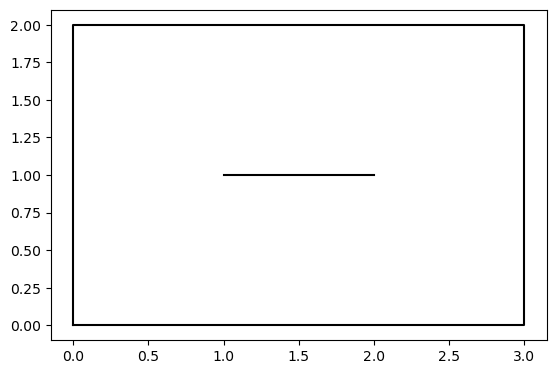

In [45]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([[0, 3, 3, 0, 0, np.nan, 1, 2],
              [0, 0, 2, 2, 0, np.nan, 1, 1]])

plt.plot(M[0], M[1], color='black')
plt.gca().set_aspect('equal')
plt.show()


## Lausn 30.2

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
[[ 0.          2.59807621  1.59807621 -1.          0.        ]
 [ 0.          1.5         3.23205081  1.73205081  0.        ]]


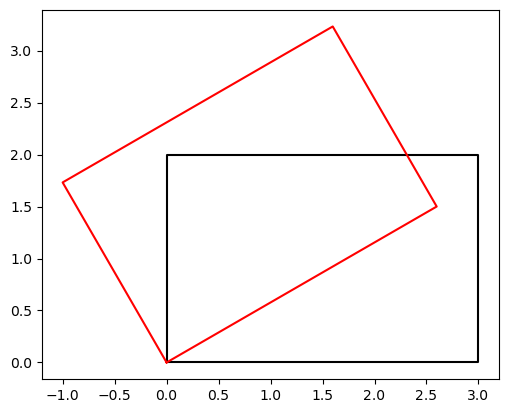

In [46]:
import numpy as np

def snuningsfylki(theta):
    # Skilar snúningsfylki fyrir hornið theta (í gráðum)
    theta = np.radians(theta)
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

R = snuningsfylki(30)
print(R)

# Snúum rétthyrningnum í lið 1
M = np.array([[0, 3, 3, 0, 0],
              [0, 0, 2, 2, 0]])
M_snud = R @ M
print(M_snud)

import matplotlib.pyplot as plt

plt.plot(M[0], M[1], color='black')
plt.plot(M_snud[0], M_snud[1], color='red')
plt.gca().set_aspect('equal')
plt.show()


## Lausn 30.3


[[ 0.  0.  5.  5.  0. nan  1.  1.  4.  4.  1.]
 [ 0.  3.  3.  0.  0. nan  1.  2.  2.  1.  1.]]


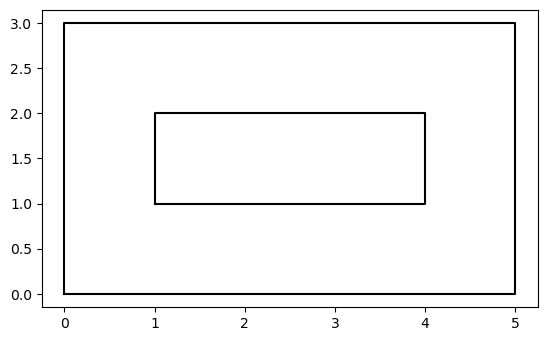

In [47]:
import numpy as np
import matplotlib.pyplot as plt

stærri = np.array([[0, 0], [0, 3], [5, 3], [5, 0], [0, 0]])
minni = np.array([[1, 1], [1, 2], [4, 2], [4, 1], [1, 1]])
M = np.hstack([stærri.T, np.nan*np.ones((2,1)), minni.T])
print(M)

plt.plot(M[0], M[1], color='black')
plt.gca().set_aspect('equal')
plt.show()


## Lausn 30.4


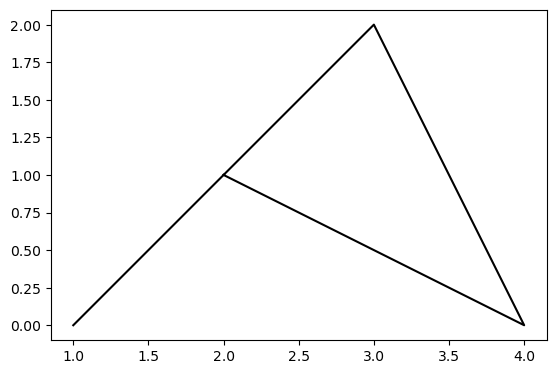

In [48]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([1, 0])
B = np.array([3, 2])
C = np.array([4, 0])
H = np.array([3, 0])

AB = B - A
AC = C - A
AH = H - A
proj_H = A + ((np.dot(AH, AB) / np.dot(AB, AB)) * AB)

T = np.array([A, B, C, proj_H]).T

plt.plot(T[0], T[1], color='black')
plt.gca().set_aspect('equal')
plt.show()


## Lausn 30.5

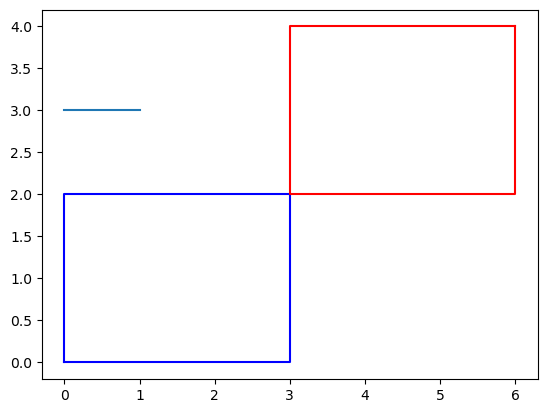

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def hiðra_snúa_hliðra(mynd, horn, punktur):
    # Hliðra myndinni svo punkturinn sem skal snúa um verður í (0,0)
    T1 = np.array([[1, 0, -punktur[0]], [0, 1, -punktur[1]], [0, 0, 1]])
    mynd_hlidrad = T1 @ mynd
    
    # Snúa um hornið
    radianar = np.deg2rad(horn)
    R = np.array([[np.cos(radianar), -np.sin(radianar), 0], 
                  [np.sin(radianar), np.cos(radianar), 0], 
                  [0, 0, 1]])
    mynd_snud = R @ mynd_hlidrad
    
    # Hliðra myndinni aftur á réttan stað
    T2 = np.array([[1, 0, punktur[0]], [0, 1, punktur[1]], [0, 0, 1]])
    mynd_snud_hlidrad = T2 @ mynd_snud
    
    return mynd_snud_hlidrad


# Liður 4: Þríhyrningur með hæð
A = np.array([1, 0, 1])
B = np.array([3, 2, 1])
C = np.array([4, 0, 1])

# Hæðin gengur frá B niður á hliðina AC
AC = C - A
hæðstika = np.array([-AC[1], AC[0], 0])
T = np.array([[1, 0, B[0]], [0, 1, B[1]], [0, 0, 1]])
T_1 = np.array([[1, 0, -B[0]], [0, 1, -B[1]], [0, 0, 1]])
AC_hliðrað = T_1 @ AC
lengd_hæðar = np.linalg.norm(AC_hliðrað)

# Mynda lista með hornum fyrir rétthyrningar á samsíða yfirborði
horn = [0, 30, 60, 90, 120, 150]
rett_hy = np.array([[0, 0, 1], [3, 0, 1], [3, 2, 1], [0, 2, 1], [0, 0, 1]])

# Liður 5: Hliðra–snúa–hliðra
rett_hy_snud = hiðra_snúa_hliðra(rett_hy.T, 180, B).T

# Teikna upphaflega og snúna rétthyrningana
plt.plot(rett_hy[:,0], rett_hy[:,1], 'b-')
plt.plot(rett_hy_snud[:,0], rett_hy_snud[:,1], 'r-')
plt.plot([B[0], B[0] + hæðstika[0]])


## Lausn 30.6


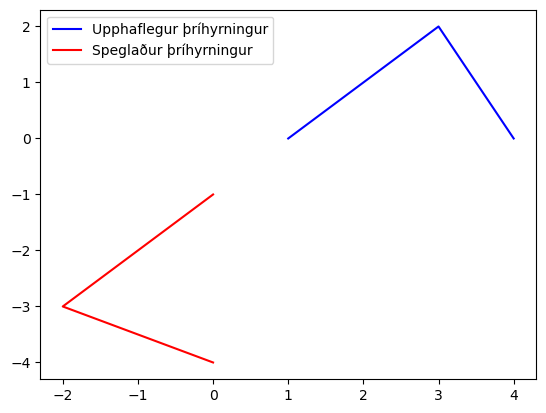

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Þríhyrningur með hæð
T = np.array([[1, 3, 4], [0, 2, 0]])
B = np.array([[3], [2]])

# Reiknum stigulhorn línu y = ax
a = 1  # Breyta með ákveðnu gildi
theta = np.arctan(a)

# Finnum snúningsfylkið
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# Finnum speglunarfylkið
S = np.array([[1, 0], [0, -1]])

# Finnum fylkið sem snýr til baka
R_inv = np.linalg.inv(R)

# Finnum samanlagt fylki sem snýr, speglar og snýr til baka
M = R_inv @ S @ R

# Spegla T um línuna y = ax
T2 = M @ T

# Teiknum upphaflega og snúna þríhyrninginn á sama mynd
plt.plot(T[0], T[1], 'b-', label='Upphaflegur þríhyrningur')
plt.plot(T2[0], T2[1], 'r-', label='Speglaður þríhyrningur')
plt.legend()
plt.show()


# Lausn við 33.1

In [64]:
import numpy as np

fylki = np.array([[0.1, 0.1], [0.3, 0.1], [0.5, 0.2], [0.4, 0.4], [0.1, 1.0]])
fjoldi = np.array([100, 200, 300, 200, 200])

stofnstaerd = np.zeros((7, 2))
stofnstaerd[0] = fjoldi[0] - (fylki[0, 1] * fjoldi[0])

for i in range(1, 7):
    f = fylki[i%5]
    stofnstaerd[i] = stofnstaerd[i-1] * (1 + f[0] - f[1])

print(stofnstaerd)


[[ 90.     90.   ]
 [108.    108.   ]
 [140.4   140.4  ]
 [140.4   140.4  ]
 [ 14.04   14.04 ]
 [ 14.04   14.04 ]
 [ 16.848  16.848]]


## Lausn 33.2 

Já, stofninn mun að lokum deyja út vegna mismunandi fæðingar- og danartíðni í mismunandi aldursbölum. Eins og má sjá í upphafspóstinum er fæðingartíðni lægst á 0-1 ára aldri og hækkar síðan á eftir, með hámarki á 2-3 ára aldri. Danartíðni hækkar hins vegar með aldrinum og nálgast hámarki á 4-5 ára aldri. Þegar stofnstærðin verður neikvæð, þá er hún orðin jafnvel minni en enginn fjöldi, svo það er þá ekki lengur hægt að tala um lífi stofnsins. Þetta gerist í þessu tilfelli á árinu 7, eins og var sýnt í útreikningum.

## Lausn 33.3

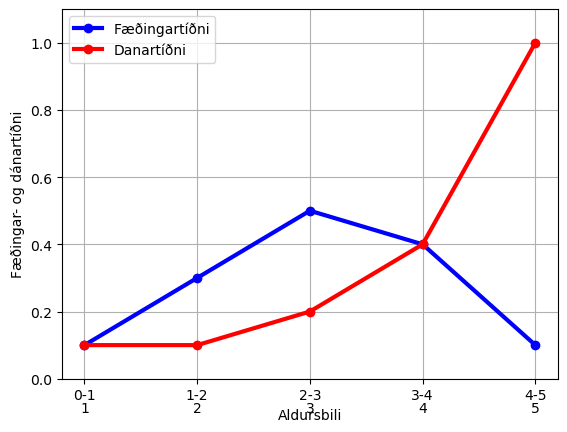

In [67]:
import numpy as np
import matplotlib.pyplot as plt

aldur = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
fæðing = np.array([0.1, 0.3, 0.5, 0.4, 0.1])
danir = np.array([0.1, 0.1, 0.2, 0.4, 1.0])

x_fæðing = aldur
y_fæðing = fæðing
x_danir = aldur
y_danir = danir

plt.plot(x_fæðing, y_fæðing, 'o-', color='blue', linewidth=3, label='Fæðingartíðni')
plt.plot(x_danir, y_danir, 'o-', color='red', linewidth=3, label='Danartíðni')
plt.ylim(0, 1.1)
plt.ylabel('Fæðingar- og dánartíðni')
plt.xticks(aldur, ['0-1', '1-2', '2-3', '3-4', '4-5'])
plt.xlabel('Aldursbili')
plt.legend()
plt.grid()

for i, v in enumerate(aldur):
    plt.text(v, -0.1, str(i+1), fontsize=10, ha='center')

plt.show()


## Lausn 33.4

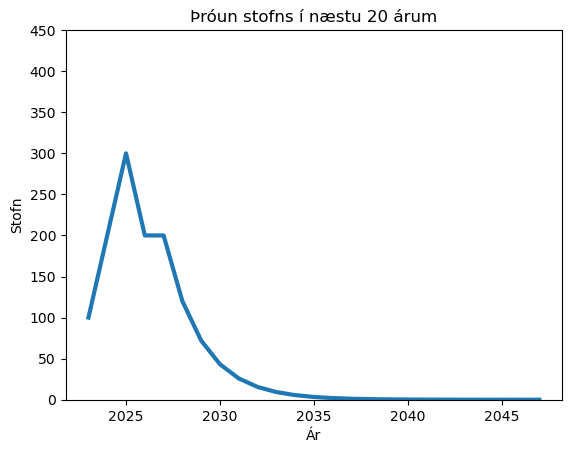

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Gögn sem tilgreina fæðingar- og dánartíðni ásamt stofnstærðum í byrjun
fæðingartíðni = np.array([0.1, 0.3, 0.5, 0.4, 0.1])
danartíðni = np.array([0.1, 0.1, 0.2, 0.4, 1.0])
stofn = np.array([100, 200, 300, 200, 200])

# Reiknum út stofnstærðirnar fyrir næstu 20 ár
for ár in range(1, 21):
    # Reiknum út nýja stofnstærðina með því að margfalda gömlu stofnstærðina
    # með einu plús mismun milli fæðingar- og dánartíðni
    ný_stofn = stofn[-1] + (stofn[-1] * (fæðingartíðni - danartíðni)).sum()
    stofn = np.append(stofn, ný_stofn)

# Búum til fylki af öllum árunum sem við viljum mynda línurit af
árin = np.arange(2023, 2043 + len(stofn) - 20)

# Teiknum línurit
plt.plot(árin, stofn, linewidth=3)
plt.ylim(0, 450)
plt.xlabel('Ár')
plt.ylabel('Stofn')
plt.title('Þróun stofns í næstu 20 árum')
plt.show()
